## VGG Initialization

In [1]:
import numpy as np
# For dynamic loss plots
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output

# TORCH!
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

# Torch model zoo
import torchvision as tv
import torchvision.transforms as transforms
import torchvision.models as models

## PRELIMINARIES ##
import VGGtiny
# To show python tensor images
def imshow(img):
    if len(img.shape) == 4:
        img = tv.utils.make_grid(img)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


In [ ]:
## MAIN MODEL INITIALIZATION, UNTRAINED
tinyvgg = VGGtiny.vgg16()
tinyvgg

VGGtiny(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Co

## Run embedded training procedure

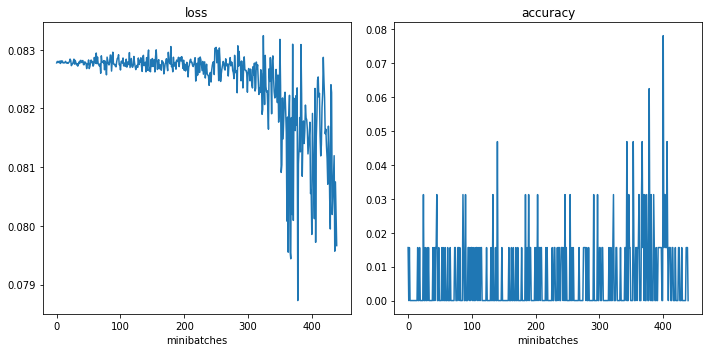

In [ ]:
tinyvgg.train(plotmode=True)

# Test embedded functions

## Load Data

In [3]:
datadir = '/Users/zaharia/Downloads/tiny-imagenet-200/'

# LOAD CLASS LABELS
labelset = {}
with open(datadir + "words.txt") as f:
    for line in f:
       (key, val) = line.rstrip().split(None,1)
       labelset[key] = val

# Convert class codes to actual labels, e.g. labels[trainset.classes[2]]
def idx2label(s,i):
    if not isinstance(i,int) and i.numel()>1: # Recurse
        i = i.data
        labs = [idx2label(s,ii) for ii in i]
    else:
        labs = labelset[s.classes[i]]
    return labs

In [4]:
# To transform PIL (jpeg) images into Python tensors, normalized with 0.5 mean & std
transform = transforms.Compose(
    [transforms.RandomCrop(56),                    # RANDOM 87.5% CROP, like VGG-16 256->224
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load training data
trainset = tv.datasets.ImageFolder(datadir + 'train/',transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size=64,
                                          shuffle=True,
                                          num_workers=2)


2
bullfrog, Rana catesbeiana


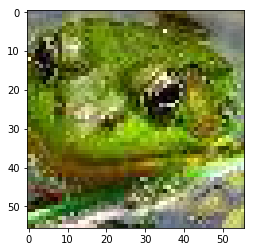

In [5]:
# Inspect loaded data
print(trainset[1001][1])
print(idx2label(trainset,trainset[1001][1])) # ==> print(labels[trainset.classes[trainset[1001][1]]])
imshow(trainset[1001][0])

In [6]:
trainiter = iter(trainloader)
images,labels = trainiter.next()

Process Process-1:
Process Process-2:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 343, in get

['kimono',
 "potter's wheel",
 'baboon',
 'beach wagon, station wagon, wagon, estate car, beach waggon, station waggon, waggon',
 'pole',
 'obelisk',
 'tabby, tabby cat',
 'jinrikisha, ricksha, rickshaw',
 'oboe, hautboy, hautbois',
 'lawn mower, mower',
 'school bus',
 'bison',
 'sea slug, nudibranch',
 'American alligator, Alligator mississipiensis',
 'parking meter',
 'coral reef',
 'sea slug, nudibranch',
 'king penguin, Aptenodytes patagonica',
 'lampshade, lamp shade',
 'fly',
 'stopwatch, stop watch',
 'space heater',
 'brass, memorial tablet, plaque',
 'stopwatch, stop watch',
 'fur coat',
 'tarantula',
 'golden retriever',
 'barbershop',
 'Yorkshire terrier',
 'bison',
 "spider web, spider's web",
 'go-kart',
 'thatch, thatched roof',
 'magnetic compass',
 'organ, pipe organ',
 'teddy, teddy bear',
 'cauliflower',
 'dining table, board',
 'hog, pig, grunter, squealer, Sus scrofa',
 'plate',
 'sandal',
 'sombrero',
 'crane',
 'steel arch bridge',
 'ladybug, ladybeetle, lady bee

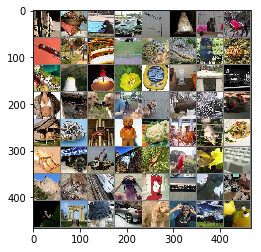

In [7]:
imshow(images)
idx2label(trainset,labels)

## Evaluate model on images

In [11]:
# outputs = tinyvgg(torch.randn(4,3,56,56)) # test proper image sizing
outputs = tinyvgg(images)

In [12]:
_, predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % idx2label(trainset,predicted.data[j])
                              for j in range(0,4)))

Predicted:  kimono kimono mantis, mantid kimono


## Set up training procedures

In [17]:
target = torch.empty(trainloader.batch_size, dtype=torch.long).random_(200) # a dummy target, for example
# output = torch.randn(4, 200, requires_grad=True)
outputs = tinyvgg(images)

# zero gradients
tinyvgg.zero_grad()
outputs.backward(torch.randn(trainloader.batch_size, 200),retain_graph=True)

# set up loss function
criterion = nn.CrossEntropyLoss()
loss = criterion(outputs, target)

print(loss)
loss.backward()
print(loss)

tensor(5.2964)
tensor(5.2964)


In [18]:
# create your optimizer
optimizer = optim.SGD(tinyvgg.parameters(), lr=0.01, momentum=0.9)

optimizer.zero_grad()   # zero the gradient buffers

# in your training loop:
outputs = tinyvgg(images)
loss = criterion(outputs, target)
loss.backward()
optimizer.step()    # Does the update

## Train model

ground truth: 
tensor([ 112,  136,   56,   70,  132,  124,   30,  111,  125,  114,
         145,   50,   17,    4,  127,  196,   17,   21,  113,   37,
         155,  151,   78,  155,  105,    9,   26,   65,   25,   50,
         152,  107,  162,  117,  126,  161,  183,   98,   48,  177,
         144,  150,   95,  154,   36,  180,   45,   92,  195,   33,
          81,   75,   90,   88,  148,   30,   42,  165,  120,  153,
          29,  148,   66,  187])
predicted: 
tensor([ 112,  112,   42,  112,   42,  112,   71,  112,  112,  112,
         112,   42,  112,   42,  112,  112,  112,   42,   42,  112,
         112,  112,   71,  112,  112,   42,   42,  112,  112,  112,
         112,  112,  112,  112,  112,   42,   42,   42,  112,   42,
          71,   42,  112,  112,   42,   71,   42,   71,   71,   51,
         112,   71,   42,  112,  112,  112,  112,   71,  112,   25,
         112,  112,  112,  112])


(None, None)

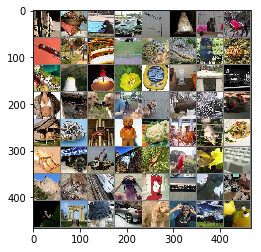

In [19]:
imshow(images)
print('ground truth: '),print(labels)
print('predicted: '),print(torch.max(outputs, 1)[1])

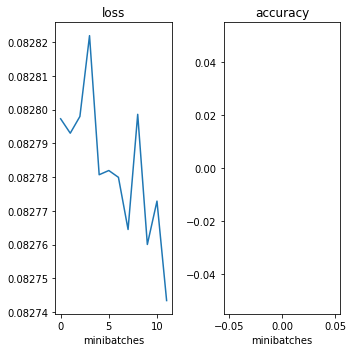

Process Process-12:
Process Process-11:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 343, in g

KeyboardInterrupt: 

> /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/autograd/__init__.py(89)backward()
     87     Variable._execution_engine.run_backward(
     88         tensors, grad_tensors, retain_graph, create_graph,
---> 89         allow_unreachable=True)  # allow_unreachable flag
     90 
     91 

ipdb> q


In [23]:
%pdb off
nupdate = 2 # number of minibatches to run before updating plot

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    losses = np.array([])
    epoch_correct = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = tinyvgg(inputs)
        loss = criterion(outputs, labels)
        losses = np.append(losses, loss.item())
        loss.backward()
        optimizer.step()
        
        # calculate accuracy
        epoch_correct += (outputs.max(1)[1] == labels).sum().data[0]

        # print statistics
        running_loss += loss.item()
        if i % nupdate == nupdate-1:    # print every 100 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 5))
#             running_loss = 0.0
            # PLOT!
            clear_output(wait=True)
            plt.figure(figsize=(5,5))
            plt.subplot(1, 2, 1)
            plt.plot(losses / trainloader.batch_size)
            plt.xlabel('minibatches')
            plt.title('loss')
            
            plt.subplot(1, 2, 2)
            plt.plot(epoch_correct / trainloader.batch_size)
            plt.xlabel('minibatches')
            plt.title('accuracy')
            
            plt.tight_layout()
            plt.show()

print('Finished Training')